In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.cluster import AgglomerativeClustering

In [21]:
tempdata_dir = "../dshan_temp_data/"

res_name = "results1118.p"
indices_name = "allIDs.p"
indices_filter_name = "allIndNoZero.p"

In [22]:
def pkl_loader(file_name):
    with open(file_name, 'rb') as f:
        objct = pickle.load(f, encoding = 'bytes')
    return(objct)

In [23]:
res = pkl_loader(tempdata_dir + res_name)
indices = pkl_loader(tempdata_dir + indices_name)
indices_filter = pkl_loader(tempdata_dir + indices_filter_name)

# filter all non-zero indices
indices = np.array(indices)
indices_filter = np.array(indices_filter)
filtered_indices = indices[indices_filter]

In [24]:
# clean calculated hidden layer
hid = np.array(res['hid'])
target = np.array(res['label'])

hid_01 = np.array(hid)
hid_gn = np.array(hid)

# 0-1 normalization
for i in range(len(hid_01[0])):
    curmin, curmax = min(hid_01[:, i]), max(hid_01[:, i])
    if curmin == curmax:
        hid_01[:, i] -= curmin
    else:
        hid_01[:, i] = (hid_01[:, i] - curmin) / (curmax - curmin)

In [27]:
print (target)

[0 0 0 ... 0 0 0]


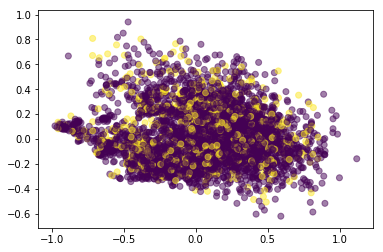

In [18]:
pca2 = PCA(2)
PCA2_hid_01 = pca2.fit_transform(hid_01)

fig_01norm = plt.figure()
plt.scatter(PCA2_hid_01[:, 0], PCA2_hid_01[:, 1], c = target, alpha=0.5)
plt.show()

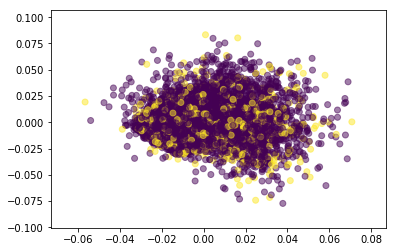

In [19]:
# Gaussian Normalization

hid_gn = normalize(hid_gn, axis = 0)
PCA2_hid_gn = pca2.fit_transform(hid_gn)

fig_Gnorm = plt.figure()
plt.scatter(PCA2_hid_gn[:, 0], PCA2_hid_gn[:, 1], c = target, alpha=0.5)
plt.show()

1. alpha value (opacity) when plotting points
2. use T-SNE to visualize
3. try the result of clustering without visualization?
4. no k-means, more agglomerative (hierarchical)
5. Gaussian normalization instead of 0-1 normalization